In [1]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, ttest_1samp

In [2]:
# Load the dataset
df = pd.read_csv("Data/winequality-red.csv")

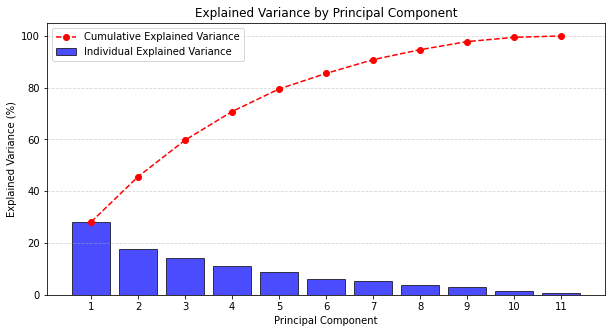

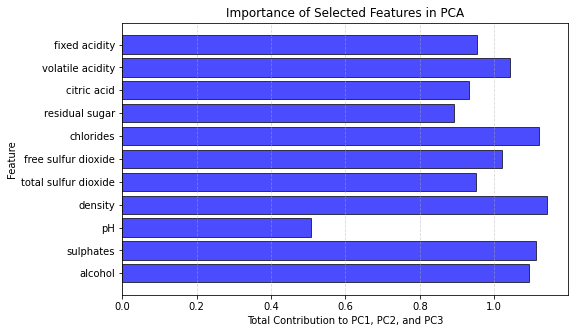

Top 3 Most Important Features in PCA (Based on PC1, PC2, and PC3):
density             1.142300
chlorides           1.119107
sulphates           1.111134
alcohol             1.093267
volatile acidity    1.042437
dtype: float64


In [21]:
from sklearn.decomposition import PCA

# Standardize the columns (Z-score normalization)
df_standardized = (df - df.mean()) / df.std()

# Drop quality column
df_standardized = df_standardized.drop(columns=["quality"])

# Apply PCA
num_components = df_standardized.shape[1]  # Use all components
pca = PCA(n_components=num_components)
pca_transformed = pca.fit_transform(df_standardized)

# Get PCA component loadings (how much each original feature contributes to each PC)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(num_components)],
    index=df_standardized.columns
)

# Compute the absolute sum of contributions across PC1, PC2, and PC3
feature_contributions_total = loadings.loc[:, ["PC1", "PC2", "PC3", "PC4"]].abs().sum(axis=1)

# Get the top 3 most important features based on total contribution
top_3_features = feature_contributions_total.sort_values(ascending=False).head(5)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Compute the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance for each principal component
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.7, color="blue", edgecolor="black", label="Individual Explained Variance")
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance * 100, marker='o', linestyle='--', color="red", label="Cumulative Explained Variance")

# Labels and title
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Explained Variance by Principal Component")
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the plot
plt.show()

# Plot the importance of selected features across PC1, PC2, and PC3
plt.figure(figsize=(8, 5))
plt.barh(feature_contributions_total.index, feature_contributions_total.values, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Total Contribution to PC1, PC2, and PC3")
plt.ylabel("Feature")
plt.title("Importance of Selected Features in PCA")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

# Print the top 3 most important features
print("Top 3 Most Important Features in PCA (Based on PC1, PC2, and PC3):")
print(top_3_features)

